In [3]:
#importing data visualization and manipulation libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#importing machine learning libraries

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
#importing dataset

df = pd.read_csv(r"C:\co2 - emission\New folder\CO2 Emissions_Canada.csv")

In [5]:
#checking for null values, didn't expect any

df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
#I chose to rename this column to something easier to type as it is used very frequently 

df.rename(columns={'CO2 Emissions(g/km)' : 'CO2_emission'}, inplace=True)

In [7]:
df2 = df.copy()

In [8]:
df2.drop('Fuel Consumption Comb (mpg)', axis = 1, inplace = True)

In [9]:
df2.rename(columns={'Fuel Consumption Comb (L/100 km)' : 'Fuel_Cons_comb_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Consumption Hwy (L/100 km)' : 'Fuel_Cons_hwy_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Consumption City (L/100 km)' : 'Fuel_Cons_city_(l/100km)'}, inplace=True)

In [10]:
df2.rename(columns={'Fuel Type' : 'Fuel_type'}, inplace=True)

In [11]:
#updated dataset

df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [12]:
#getting to know the dataset a little more in the next few steps

df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [13]:
df['Transmission'].value_counts()

Transmission
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64

In [19]:
#discovering correlation

df.corr(numeric_only=True)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2_emission,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<Axes: >

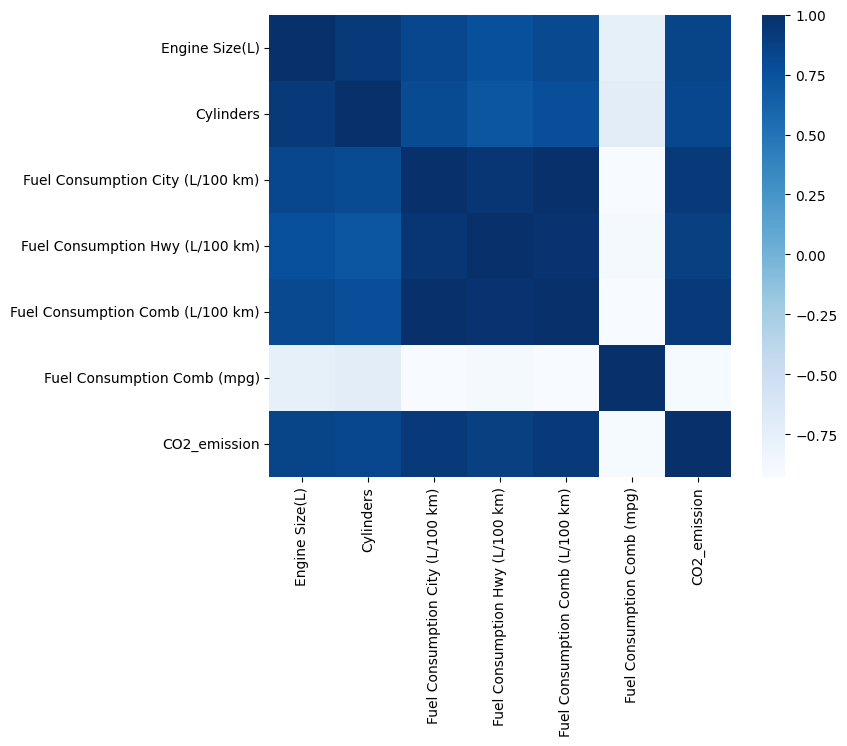

In [30]:
#heatmap for a better understanding of correlated values

plt.figure(figsize = (8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np), cmap = 'Blues', square = True)

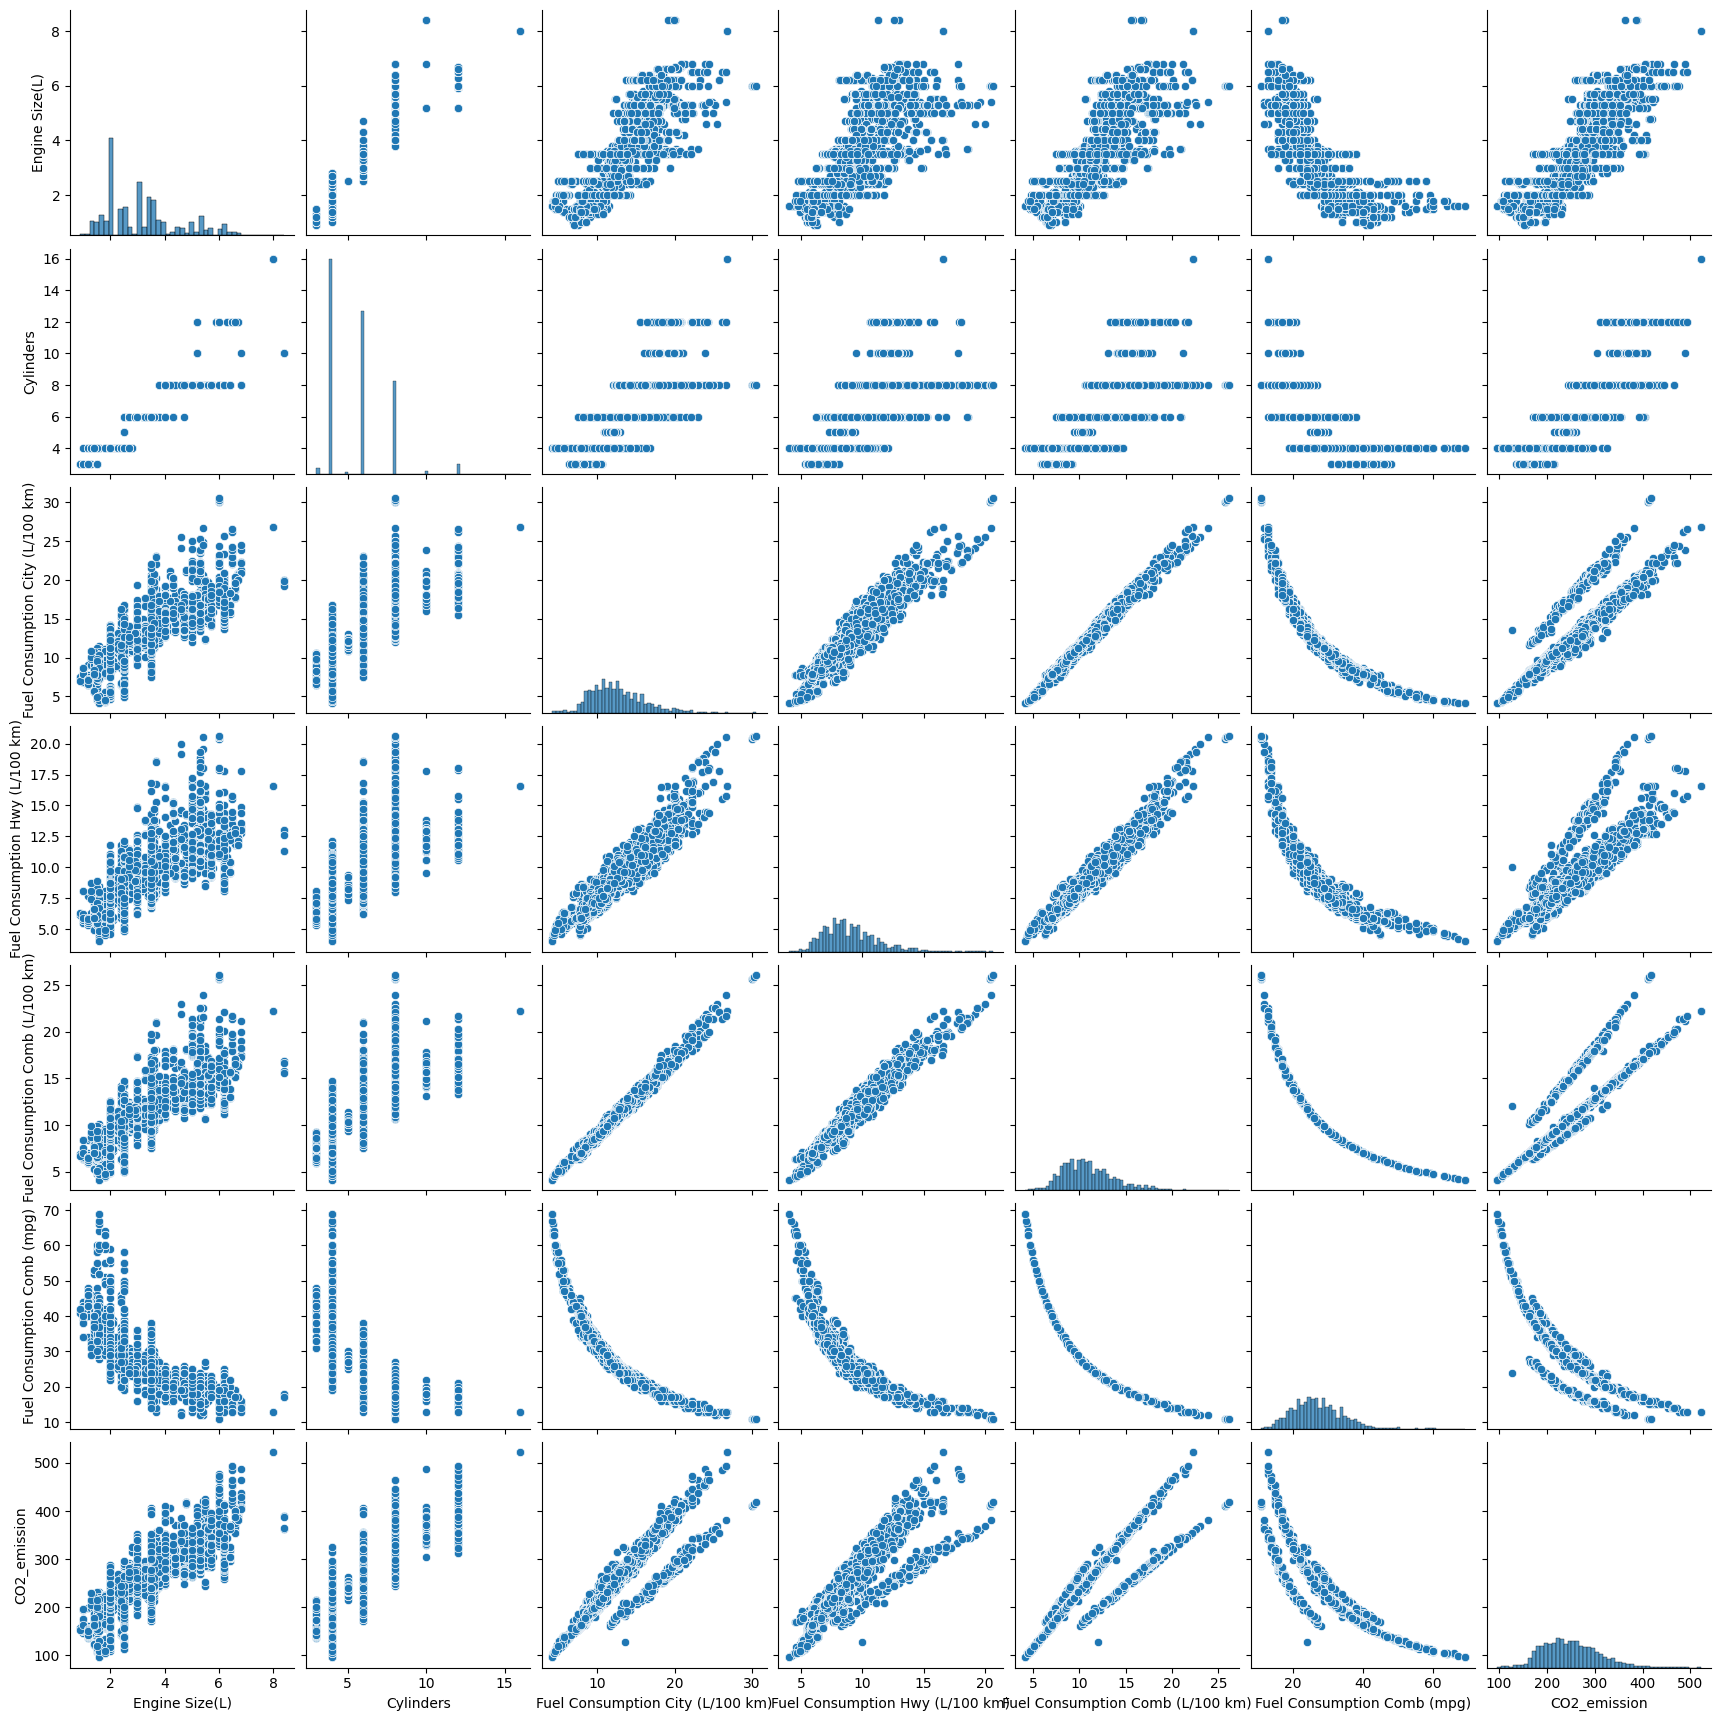

In [31]:
#I have a habit of using pairplot function of seaborn to see how each individual graph looks like

sns.pairplot(df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'FORD'),
  Text(1, 0, 'CHEVROLET'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'MERCEDES-BENZ'),
  Text(4, 0, 'PORSCHE'),
  Text(5, 0, 'TOYOTA'),
  Text(6, 0, 'GMC'),
  Text(7, 0, 'AUDI'),
  Text(8, 0, 'NISSAN'),
  Text(9, 0, 'JEEP'),
  Text(10, 0, 'DODGE'),
  Text(11, 0, 'KIA'),
  Text(12, 0, 'HONDA'),
  Text(13, 0, 'HYUNDAI'),
  Text(14, 0, 'MINI'),
  Text(15, 0, 'VOLKSWAGEN'),
  Text(16, 0, 'MAZDA'),
  Text(17, 0, 'LEXUS'),
  Text(18, 0, 'JAGUAR'),
  Text(19, 0, 'CADILLAC'),
  Text(20, 0, 'SUBARU'),
  Text(21, 0, 'VOLVO'),
  Text(22, 0, 'INFINITI'),
  Text(23, 0, 'BUICK'),
  Text(24, 0, 'RAM'),
  Text(25, 0, 'LINCOLN'),
  Text(26, 0, 'MITSUBISHI'),
  Text(27, 0, 'CHRYSLER'),
  Text(28, 0, 'LAND ROVER'),
  Text(29, 0, 'FIAT'),
  Text(30, 0, 

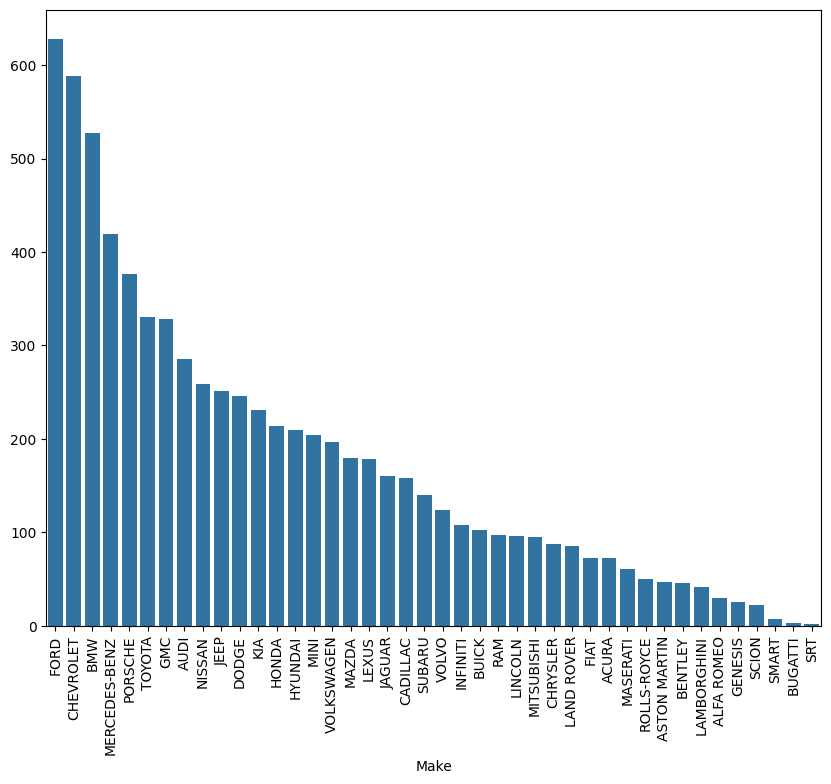

In [50]:
#Some visualizations to show our understanding of the dataset

mkI = df['Make'].value_counts().index
mkV = df['Make'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(x=mkI,y=mkV,)
plt.xticks(rotation='vertical')

C:\Users\com\AppData\Local\Temp\ipykernel_8200\344643472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mkV,y=mkI, orient = 'h', palette='Spectral')


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])

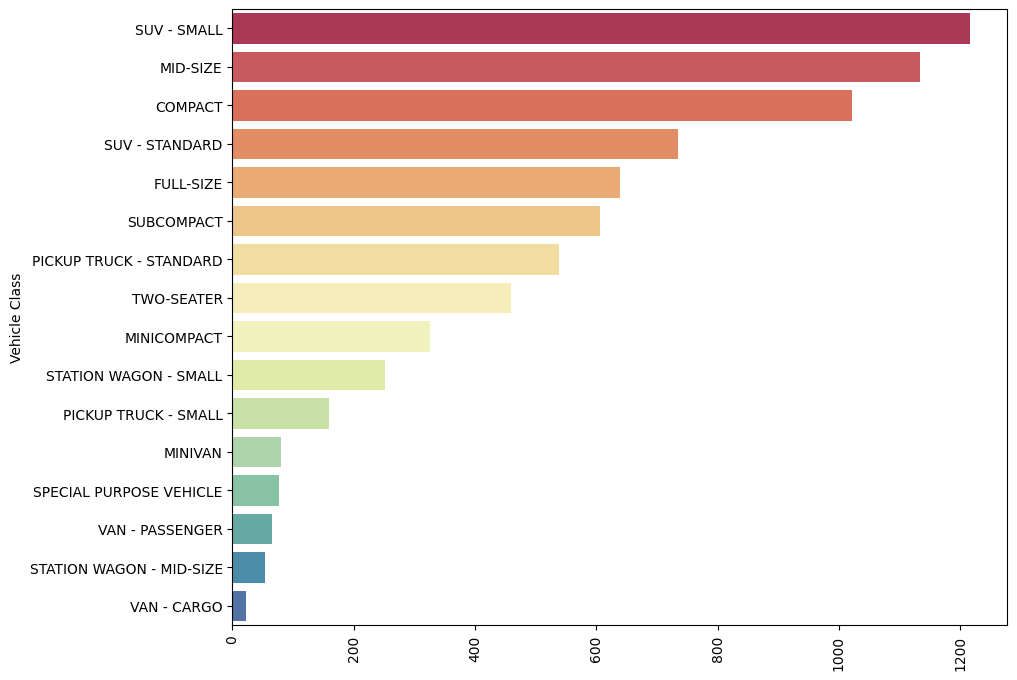

In [52]:
mkI = df['Vehicle Class'].value_counts().index
mkV = df['Vehicle Class'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(x=mkV,y=mkI, orient = 'h', palette='Spectral')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'COMPACT'),
  Text(1, 0, 'SUV - SMALL'),
  Text(2, 0, 'MID-SIZE'),
  Text(3, 0, 'TWO-SEATER'),
  Text(4, 0, 'MINICOMPACT'),
  Text(5, 0, 'SUBCOMPACT'),
  Text(6, 0, 'FULL-SIZE'),
  Text(7, 0, 'STATION WAGON - SMALL'),
  Text(8, 0, 'SUV - STANDARD'),
  Text(9, 0, 'VAN - CARGO'),
  Text(10, 0, 'VAN - PASSENGER'),
  Text(11, 0, 'PICKUP TRUCK - STANDARD'),
  Text(12, 0, 'MINIVAN'),
  Text(13, 0, 'SPECIAL PURPOSE VEHICLE'),
  Text(14, 0, 'STATION WAGON - MID-SIZE'),
  Text(15, 0, 'PICKUP TRUCK - SMALL')])

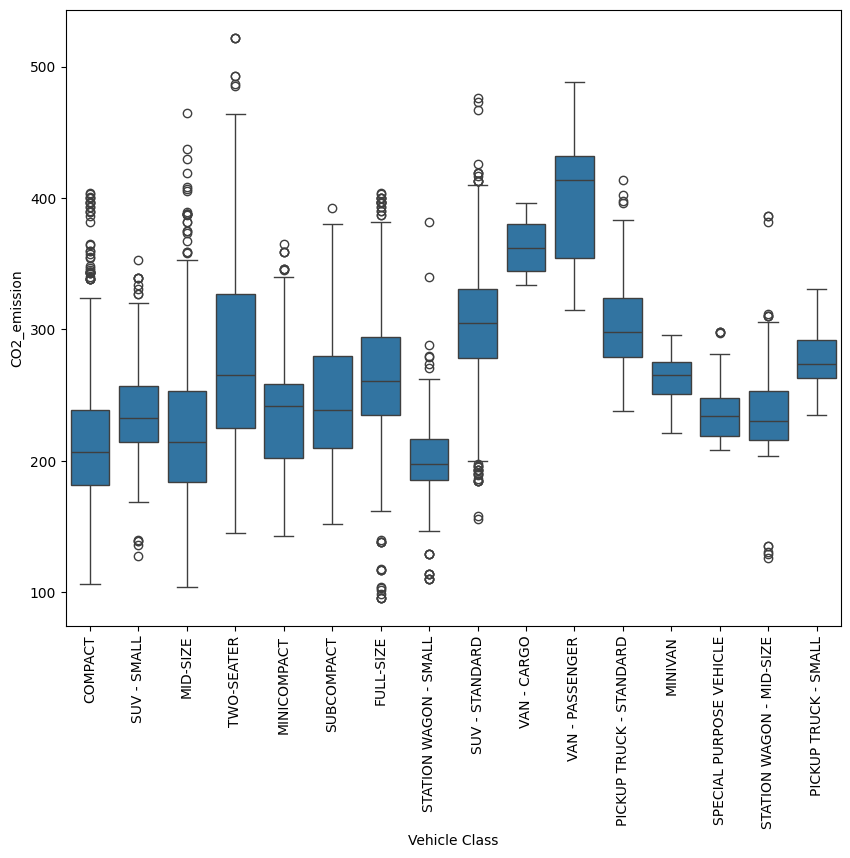

In [53]:
#this boxplot shows us that Vans typically emit more CO2 when compared to other vehicle classes

plt.figure(figsize = (10,8))
sns.boxplot(x="Vehicle Class", y="CO2_emission", data=df)
plt.xticks(rotation = 'vertical')

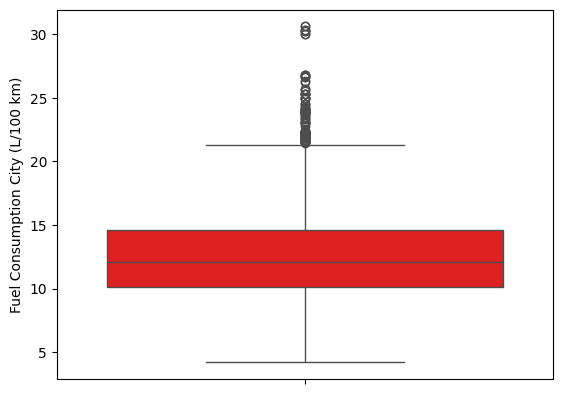

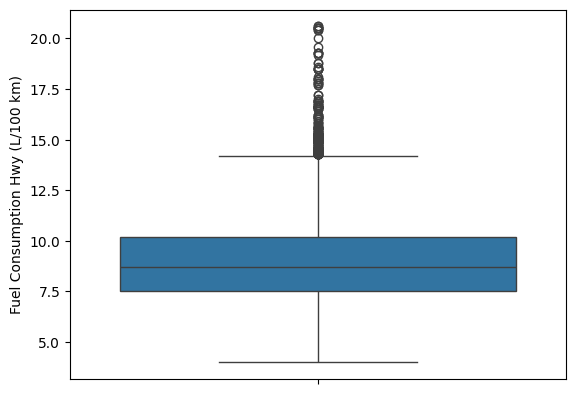

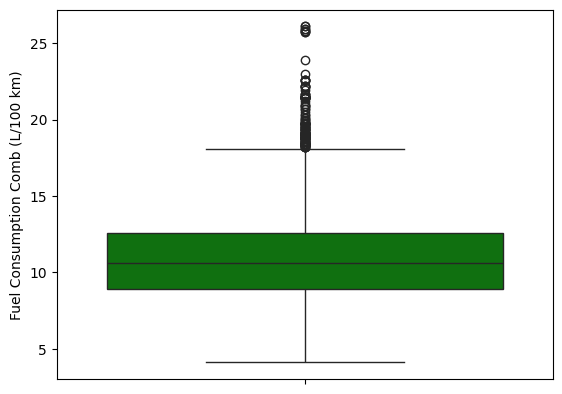

In [54]:
sns.boxplot(df['Fuel Consumption City (L/100 km)'], color = "red")
plt.show()
sns.boxplot(df['Fuel Consumption Hwy (L/100 km)'])
plt.show()
sns.boxplot(df['Fuel Consumption Comb (L/100 km)'], color = 'green')
plt.show()

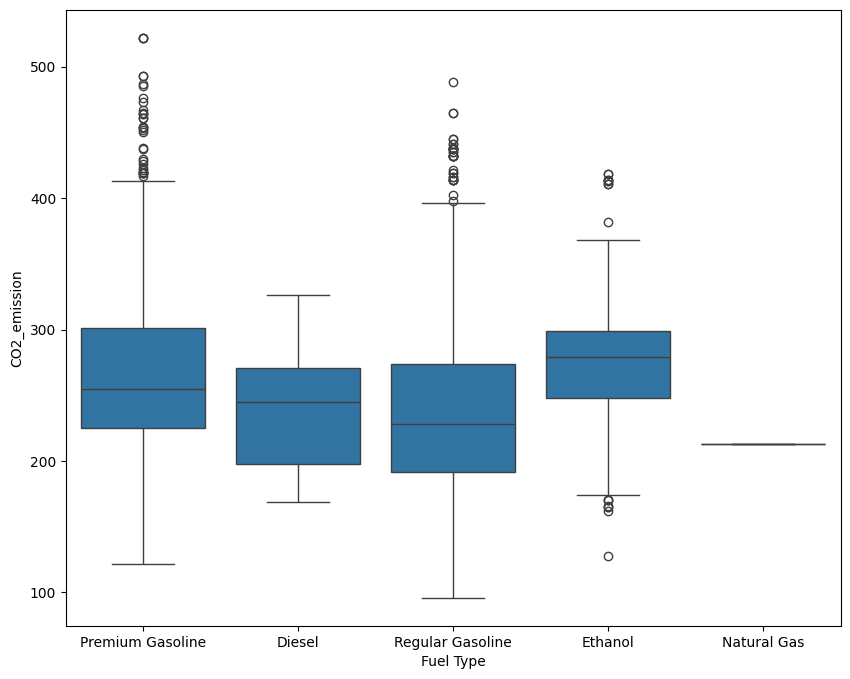

In [55]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Fuel Type' , y = 'CO2_emission', data = df)
plt.xticks([0,1,2,3,4],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol','Natural Gas'])
plt.show()

<Figure size 1000x800 with 0 Axes>

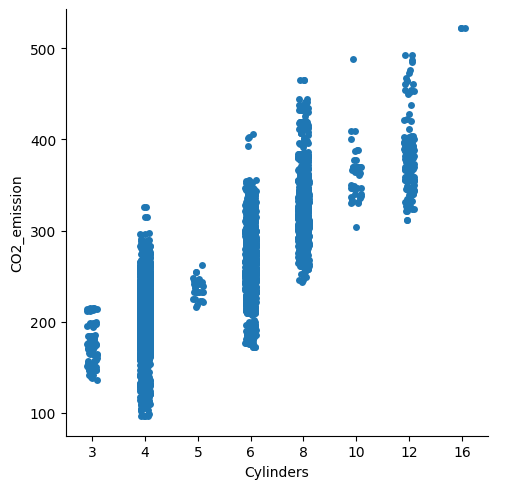

In [56]:
plt.figure(figsize = (10,8))
sns.catplot(x = 'Cylinders' , y = 'CO2_emission', data = df)
plt.show()

C:\Users\com\AppData\Local\Temp\ipykernel_8200\4131998758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'Fuel Consumption Comb (mpg)', x = 'Fuel Type', data = df, palette = 'muted')


([<matplotlib.axis.XTick at 0x282cbf72610>,
 [Text(0, 0, 'Premium Gasoline'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Regular Gasoline'),
  Text(3, 0, 'Ethanol'),
  Text(4, 0, 'Natural Gas')])

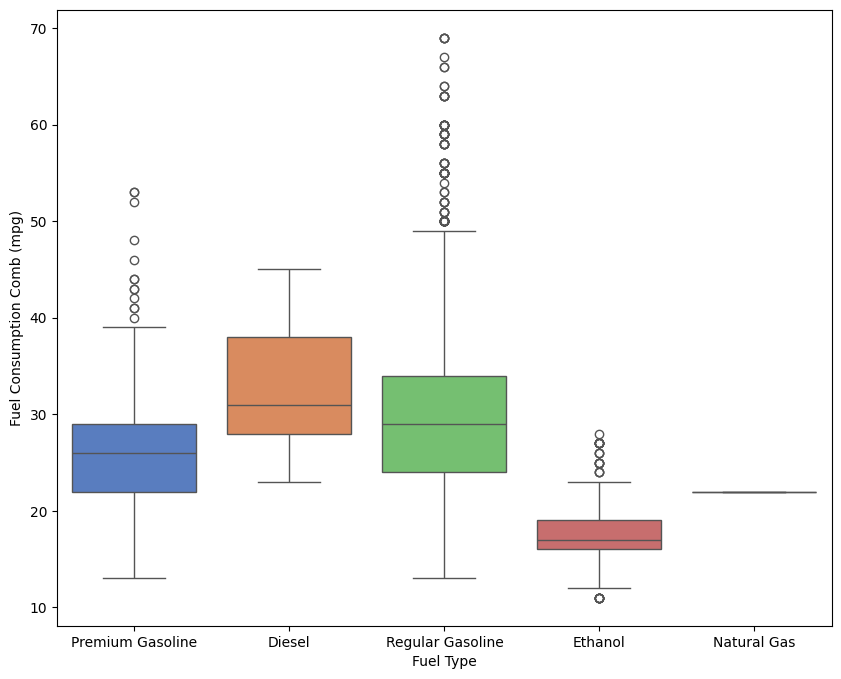

In [57]:
#Ethanol typically is the most efficient fuel type 

plt.figure(figsize = (10,8))
sns.boxplot(y = 'Fuel Consumption Comb (mpg)', x = 'Fuel Type', data = df, palette = 'muted')
plt.xticks([0,1,2,3,4],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol','Natural Gas'])

C:\Users\com\AppData\Local\Temp\ipykernel_8200\1713830469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fuel Consumption Comb (mpg)'], bins = 10, color = 'purple')


<Axes: xlabel='Fuel Consumption Comb (mpg)', ylabel='Density'>

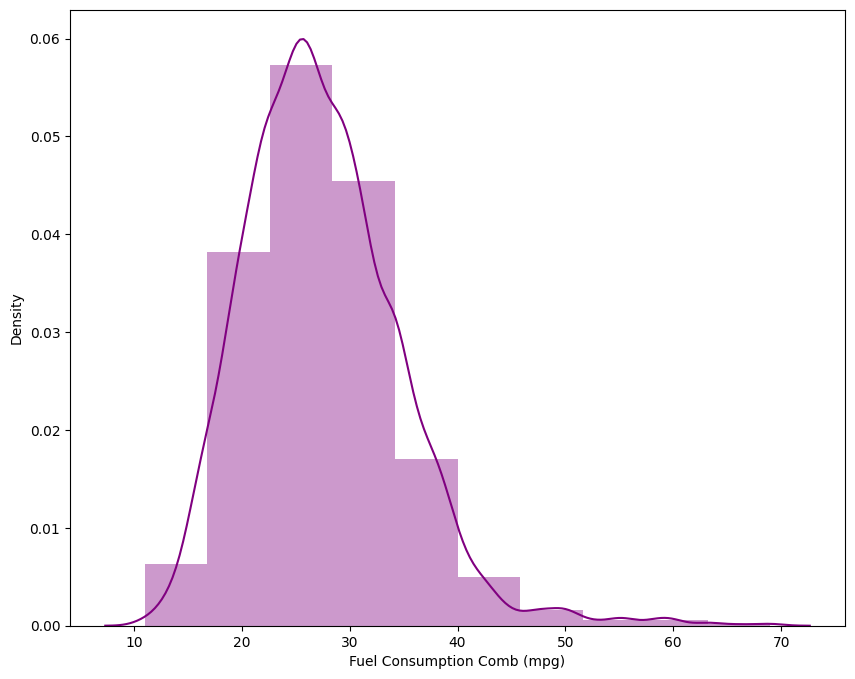

In [58]:
plt.figure(figsize = (10,8))
sns.distplot(df['Fuel Consumption Comb (mpg)'], bins = 10, color = 'purple')

In [59]:
df2.drop('Make', axis = 1, inplace = True)
df2.drop('Model', axis = 1, inplace = True)
df2.drop('Vehicle Class', axis = 1, inplace = True)

In [24]:
df2

,Engine Size(L),Cylinders,Transmission,Fuel_type,Fuel_Cons_city_(l/100km),Fuel_Cons_hwy_(l/100km),Fuel_Cons_comb_(l/100km),CO2_emission
0,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2.4,4,M6,Z,11.2,7.7,9.6,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...
7380,2.0,4,AS8,Z,10.7,7.7,9.4,219
7381,2.0,4,AS8,Z,11.2,8.3,9.9,232
7382,2.0,4,AS8,Z,11.7,8.6,10.3,240
7383,2.0,4,AS8,Z,11.2,8.3,9.9,232


In [60]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

encode.fit(df2.Fuel_type.drop_duplicates()) 
df2.Fuel_type = encode.transform(df2.Fuel_type)

encode.fit(df2.Transmission.drop_duplicates())
df2.Transmission = encode.transform(df2.Transmission)

C:\Users\com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [61]:
#assigning dependent and independent variables
#can be used with any column across the dataset provided hyperparameters are adjusted accordingly

x = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [62]:
#splitting and reshaping data into testing and training sets

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 0)

# xTrain= xTrain.reshape(-1, 1)
# yTrain= yTrain.reshape(-1, 1)
# xTest = xTest.reshape(-1, 1)
# yTest = yTest.reshape(-1, 1)

In [63]:
#linear regression model achieving 85% accuracy
#at the end of the kernel I attempted to create and use my own linear regression model to find out coefficient and intercept without using scikit learn

reg = LinearRegression()
reg.fit(xTrain, yTrain)
regYpred = reg.predict(xTest)
print(reg.score(xTest,yTest))

0.895557281109858


In [64]:
#I printed the coefficient and the intercept here to compare my model built from scratch against the imported scikit learn model

print('regression coefficient', reg.coef_, 'intercept', reg.intercept_)

regression coefficient [ 5.9291501   3.98805418 -0.14442068 10.06480752 -0.24773334  0.85868361
 14.09180563] intercept 19.229294116258103


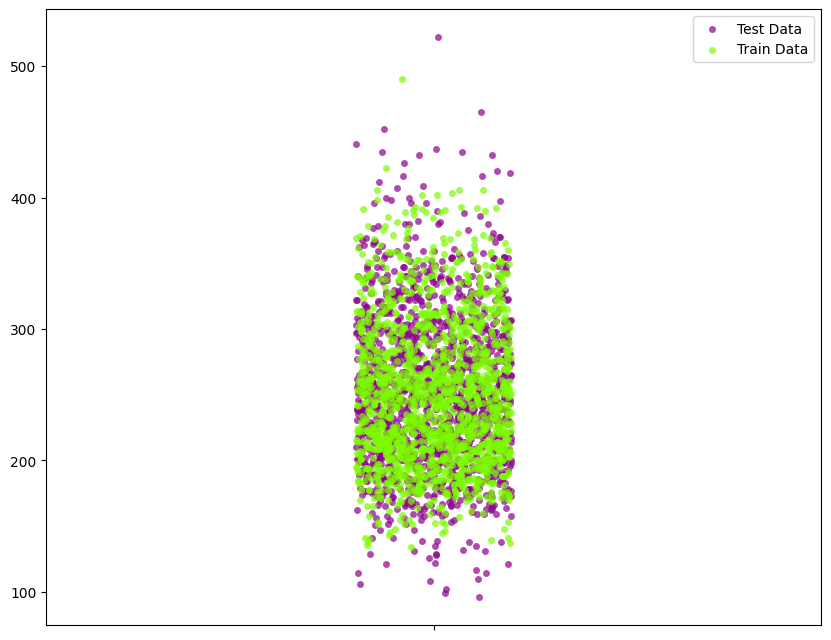

In [65]:
f, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

sns.stripplot(y = yTest.flatten(), color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = regYpred.flatten(), color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

C:\Users\com\AppData\Local\Temp\ipykernel_8200\1261146840.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regYpred, bins = 20, color = 'red')


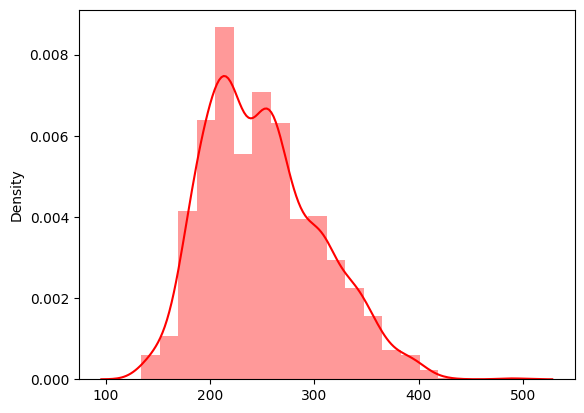

C:\Users\com\AppData\Local\Temp\ipykernel_8200\1261146840.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yTest, bins = 20)


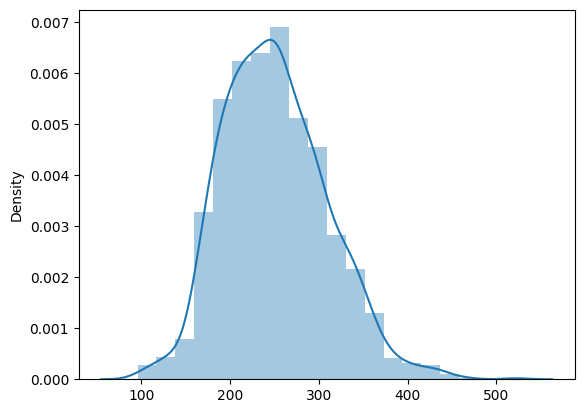

In [66]:
#I used these histograms to show Predicted values vs. Actual values in all three models

sns.distplot(regYpred, bins = 20, color = 'red')
plt.title = 'Predicted values'
plt.show()
sns.distplot(yTest, bins = 20)
plt.title = 'Actual values'
plt.show()

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2_emission'>

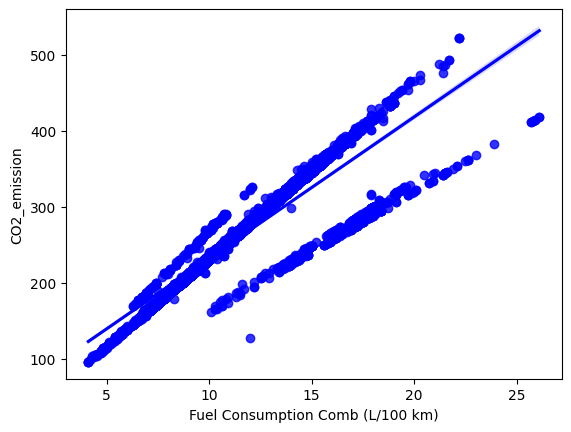

In [67]:
#Regression line showing best fit

sns.regplot(x = 'Fuel Consumption Comb (L/100 km)', y = 'CO2_emission', data  = df, color = 'blue')

In [68]:
#Decision Tree model got us a higher accuracy at 88%

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(xTrain, yTrain)
dtrYpred = dtr.predict(xTest)
dtrScore = r2_score(yTest,dtrYpred)
print('Score: %.3f' % dtrScore)

Score: 0.996


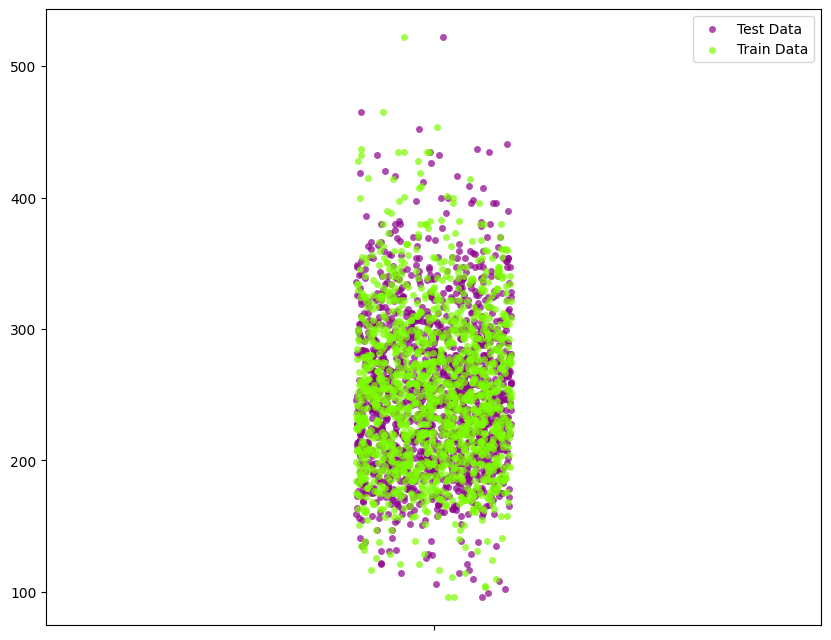

In [69]:
f, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

sns.stripplot(y = yTest.flatten(), color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = dtrYpred.flatten(), color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

C:\Users\com\AppData\Local\Temp\ipykernel_8200\2374948287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtrYpred, bins = 20, color = 'red')


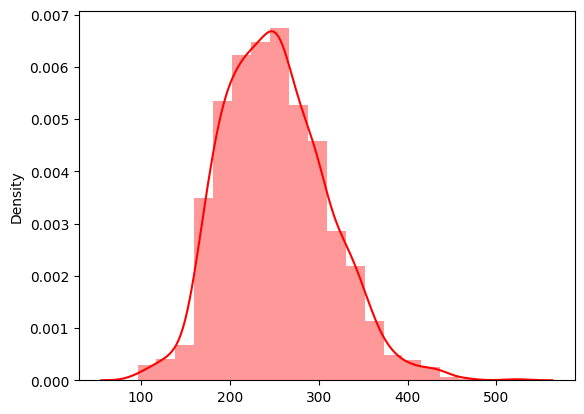

C:\Users\com\AppData\Local\Temp\ipykernel_8200\2374948287.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yTest, bins = 20)


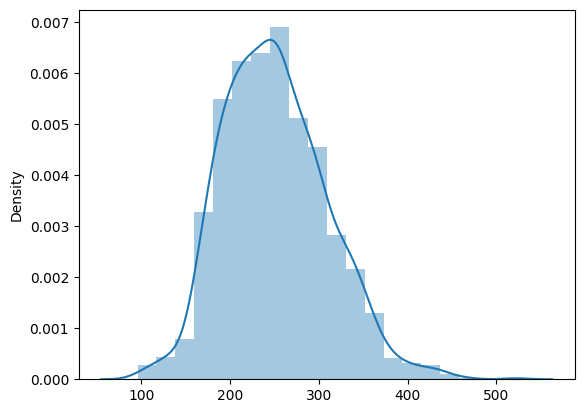

In [70]:
sns.distplot(dtrYpred, bins = 20, color = 'red')
plt.show()
sns.distplot(yTest, bins = 20)
plt.show()

In [71]:
#Random Forest Regressor had the highest accuracy standing at 89%
#I used a for loop for the n estimators to see which yielded the highest accuracy, it landed at 20

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20, random_state = 0)
rfr.fit(xTrain, yTrain)
rfrYpred = rfr.predict(xTest)
rfrScore = r2_score(yTest,rfrYpred)
print('Score: %.3f' % rfrScore)

Score: 0.996


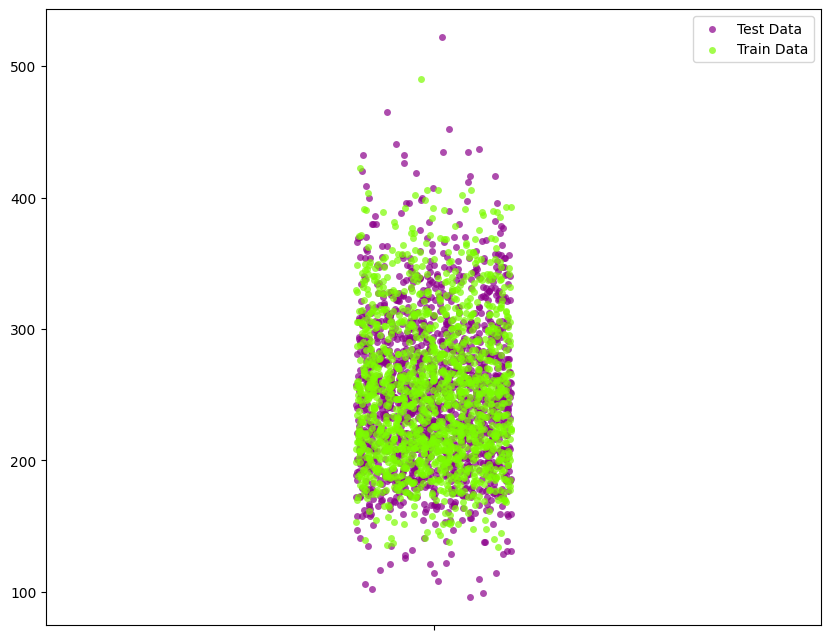

In [72]:
f, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

sns.stripplot(y = yTest.flatten(), color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = regYpred.flatten(), color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

C:\Users\com\AppData\Local\Temp\ipykernel_8200\3947499585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfrYpred, bins = 20, color = 'red')


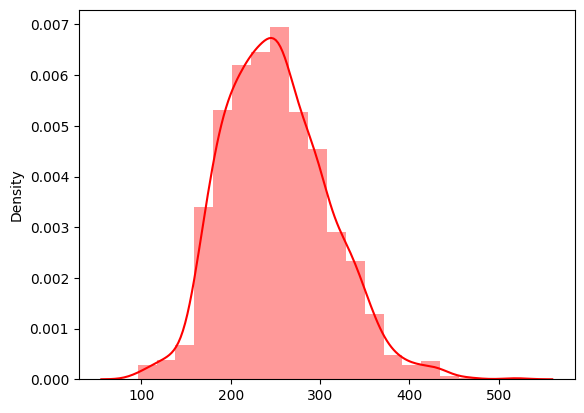

C:\Users\com\AppData\Local\Temp\ipykernel_8200\3947499585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yTest, bins = 20)


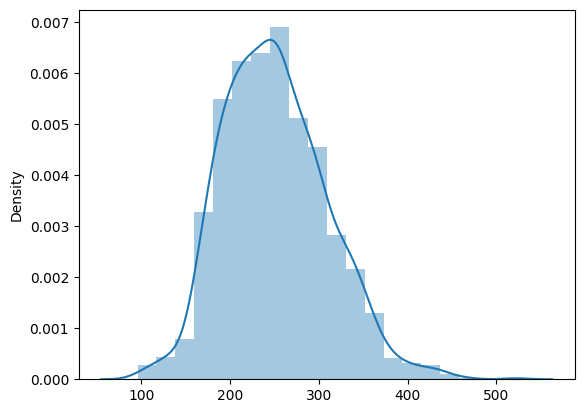

In [73]:
sns.distplot(rfrYpred, bins = 20, color = 'red')
plt.show()
sns.distplot(yTest, bins = 20)
plt.show()

Below is my attempt to build my own linear regression model from scratch to calculate coefficient and slope of the regression line

In [74]:
#calculating mean of x and y values

X,Y = xTrain,yTrain
xMean = np.mean(X)
yMean = np.mean(Y)

In [75]:
#calculating variance and covariance

covar = 0
var = 0
for i in range (len(X)):
    covar += (X[i] - xMean) * (Y[i] - yMean)
    var += (X[i]-xMean) ** 2      

In [76]:
#computing coefficient and intercepts based on previous calculations

coeff = covar/var
intercept = yMean - (coeff * xMean)

print('intercept is',intercept, 'coefficient is', coeff)

intercept is [231.08844836 182.52139867 263.59745331 248.87531126 197.40466547
  72.91482789 164.52397173] coefficient is [ 2.31721067  8.11545113 -1.56391921  0.19370288  6.33859294 21.20097429
 10.26409738]


This was my first attempt to build a linear regression model from scratch. Any and all critiques welcomed!